In [17]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable


In [18]:
!pip install numpy


Defaulting to user installation because normal site-packages is not writeable


In [19]:
!pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable


In [20]:
!pip install seaborn


Defaulting to user installation because normal site-packages is not writeable


In [21]:
!pip install torch torchvision torchaudio


Defaulting to user installation because normal site-packages is not writeable


In [22]:
!pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable


In [23]:
pip install nltk


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [34]:
import pandas as pd

In [35]:
data=pd.read_csv(r"C:\Users\gaura\Downloads\archive (3)\IMDB Dataset.csv")

In [36]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [37]:
import pandas as pd
import re
import nltk
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop=stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gaura\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:

def clean_text(text):
    # Step 1: Remove special characters and numbers
    text = re.sub('[^a-zA-Z]', ' ', text)
    
    # Step 2: Convert to lowercase
    text = text.lower()
    
    # Step 3: Split text into words
    words = text.split()
    # print("Split words:", words)  # optional, for debugging
    
    # Step 4: Remove stopwords
    filtered_words = []
    for word in words:
        if word not in stop:   # stopwords are already lowercase
            filtered_words.append(word)
    
    # Step 5: Join words back into a single string
    clean_text_str = ' '.join(filtered_words)
    
    return clean_text_str  # return the cleaned text

# Apply the function to your dataset
data['clean_review'] = data['review'].apply(clean_text)

# View first 10 cleaned reviews
print(data['clean_review'].head(10))

0    one reviewers mentioned watching oz episode ho...
1    wonderful little production br br filming tech...
2    thought wonderful way spend time hot summer we...
3    basically family little boy jake thinks zombie...
4    petter mattei love time money visually stunnin...
5    probably time favorite movie story selflessnes...
6    sure would like see resurrection dated seahunt...
7    show amazing fresh innovative idea first aired...
8    encouraged positive comments film looking forw...
9    like original gut wrenching laughter like movi...
Name: clean_review, dtype: object


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(data['clean_review'])
y = data['sentiment']


In [40]:
# Convert first review to dense array
first_review = X[0].toarray()[0]
print(first_review)  # array of TF-IDF scores

# Map scores to words
feature_names = tfidf.get_feature_names_out()
import pandas as pd
df = pd.DataFrame({'word': feature_names, 'tfidf': first_review})
df = df[df['tfidf'] > 0].sort_values(by='tfidf', ascending=False)
print(df.head(10))  # top 10 words in first review


[0. 0. 0. ... 0. 0. 0.]
          word     tfidf
3148        oz  0.551196
4770  violence  0.242317
3399    prison  0.222925
1775    forget  0.191326
4256    struck  0.171996
500         br  0.127688
3973      show  0.124992
1353       due  0.122065
4945      word  0.121435
773       city  0.120249


In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [42]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (40000, 5000)
X_test shape: (10000, 5000)
y_train shape: (40000,)
y_test shape: (10000,)


In [43]:
from sklearn.linear_model import LogisticRegression

# Create the model
model = LogisticRegression(max_iter=1000)


In [44]:
# Train on the training data
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [45]:
y_pred = model.predict(X_test)


In [46]:
from sklearn.metrics import accuracy_score, classification_report

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Detailed report
print(classification_report(y_test, y_pred))


Accuracy: 0.8924
              precision    recall  f1-score   support

    negative       0.90      0.88      0.89      4961
    positive       0.88      0.91      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [47]:
import numpy as np

# Get feature names
feature_names = tfidf.get_feature_names_out()

# Get model coefficients
coefficients = model.coef_[0]

# Top positive words
top_pos_idx = np.argsort(coefficients)[-10:]
print("Top positive words:")
for i in top_pos_idx:
    print(feature_names[i], coefficients[i])

# Top negative words
top_neg_idx = np.argsort(coefficients)[:10]
print("Top negative words:")
for i in top_neg_idx:
    print(feature_names[i], coefficients[i])


Top positive words:
favorite 4.221322262645829
hilarious 4.246165957505023
loved 4.279553632501078
brilliant 4.654063225483376
amazing 4.792205244550668
wonderful 4.891801456032551
best 4.941739262690745
perfect 5.021193320065441
excellent 6.689930642174074
great 7.133709773051466
Top negative words:
worst -10.118582342451013
waste -7.8868798834580085
bad -7.385592126329521
awful -7.256561240613863
boring -6.790647441891146
poor -5.883741569187519
terrible -5.8337675886886435
nothing -5.458290715575175
dull -5.1290648485656805
poorly -5.070671219219434


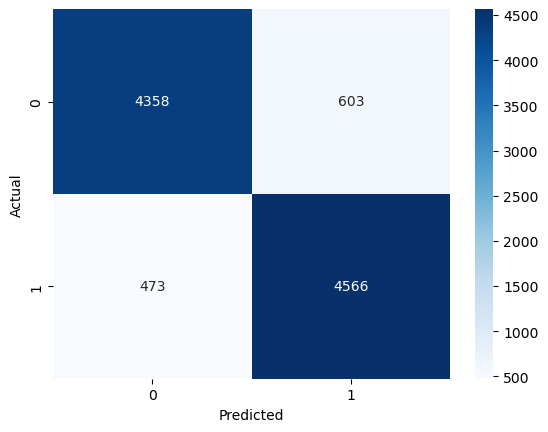

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()